In [1]:

import pandas as pd
import numpy as np
path = 'C:/Users/Batool Fatima/Desktop/MSBA Fall 2019/MSBA 6420 - Predictive Analytics/'
data = pd.read_csv(path + 'wdbc.data', header = None)

In [2]:
names = ["ID number","Diagnosis","radius_mean","radius_sd","radius_worst","texture_mean","texture_sd","texture_worst","perimeter_mean",
        "perimeter_sd","perimeter_worst","area_mean","area_sd","area_worst","smoothness_mean","smoothness_sd","smoothness_worst",
         "compactness_mean","compactness_sd", "compactness_worst","concavity_mean","concavity_sd","concavity_worst","concavity_mean",
         "concavity_sd","concavity_worst","symmetry_mean","symmetry_sd","symmetry_worst","fractal dimension_mean","fractal dimension_sd",
         "fractal dimension_worst",]

In [3]:
#renaming columns
data.columns = names

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import linear_model, neighbors

In [5]:
## Dataset dimensions
n_observe, n_feature = data.shape

features = names[2:len(names)]
target = names[1]
print('TDataset features are: ', features)
print('\n')
print('Target variable is: ', target)

TDataset features are:  ['radius_mean', 'radius_sd', 'radius_worst', 'texture_mean', 'texture_sd', 'texture_worst', 'perimeter_mean', 'perimeter_sd', 'perimeter_worst', 'area_mean', 'area_sd', 'area_worst', 'smoothness_mean', 'smoothness_sd', 'smoothness_worst', 'compactness_mean', 'compactness_sd', 'compactness_worst', 'concavity_mean', 'concavity_sd', 'concavity_worst', 'concavity_mean', 'concavity_sd', 'concavity_worst', 'symmetry_mean', 'symmetry_sd', 'symmetry_worst', 'fractal dimension_mean', 'fractal dimension_sd', 'fractal dimension_worst']


Target variable is:  Diagnosis


In [6]:
## Making a dummy variable for the target variable
y=pd.get_dummies(data.Diagnosis)

## getting all feature variables
x_all = data[features]
x_mean_features = data[features[0:30:3]]
x_sd_features = data[features[1:30:3]]
x_worst_features = data[features[2:30:3]]
x_mean_sd_features =data[features[3:30:3]]

In [7]:
## Splitting data into train (80%) and test(20%) sets (using all features) to create homogenous groups.
## Stratified sampling ensures that the class distribution between train and test are the same
X_train, X_test, y_train, y_test = train_test_split(x_all, y, test_size = 0.2, random_state=1)
 

In [8]:
## Decision Tree
## Building models for all features
mean_accuracy_train = []
mean_accuracy_test = []
depth = []
for i in range(1,11):
    clf = DecisionTreeClassifier(max_depth = i)
    clf = clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    mean_accuracy_train.append(scores.mean())
    mean_accuracy_test.append(clf.score(X_test,y_test))
    depth.append(i)
    print('The cross validation scores for depth ',i, 'are')
    print(scores)
    print('\n')

## By executing this code, we can see from the result that depth 7 gives the best results 
## when all features are considered. So we build a tree with max_depth=7. We see the same from the graph below.
## The max depth of a tree is the hyperparameter set by the user.

The cross validation scores for depth  1 are
[0.7826087  0.89130435 0.93478261 0.89130435 0.89130435 1.
 0.95555556 0.86666667 0.93333333 0.88888889]


The cross validation scores for depth  2 are
[0.86956522 0.91304348 0.93478261 0.91304348 0.93478261 1.
 0.93333333 0.91111111 0.95555556 0.91111111]


The cross validation scores for depth  3 are
[0.89130435 0.91304348 0.95652174 0.93478261 0.91304348 1.
 0.93333333 0.93333333 0.95555556 0.95555556]


The cross validation scores for depth  4 are
[0.95652174 0.95652174 0.95652174 0.91304348 0.93478261 1.
 0.97777778 0.93333333 0.97777778 0.97777778]


The cross validation scores for depth  5 are
[0.95652174 0.95652174 0.97826087 0.91304348 0.95652174 1.
 0.95555556 0.91111111 0.95555556 0.97777778]


The cross validation scores for depth  6 are
[0.97826087 0.95652174 0.95652174 0.89130435 0.97826087 1.
 0.97777778 0.88888889 0.95555556 0.95555556]


The cross validation scores for depth  7 are
[0.95652174 0.95652174 0.95652174 0.8695652

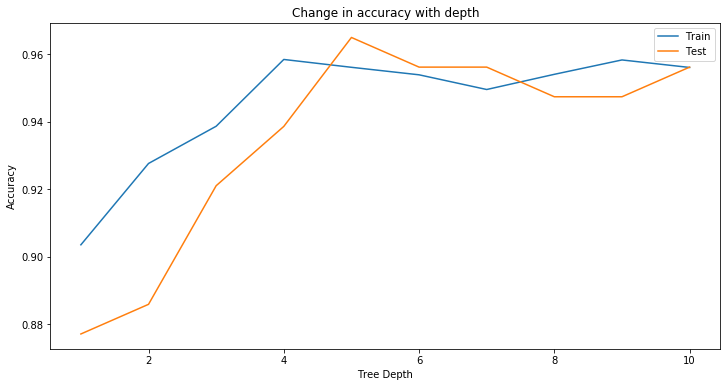

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,6))
ax.plot(depth, mean_accuracy_train)
ax.plot(depth, mean_accuracy_test)
ax.set_xlabel('Tree Depth')
ax.set_ylabel('Accuracy')
ax.legend(['Train','Test'])

ax.set_title('Change in accuracy with depth')
plt.show()

In [10]:
clf = DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X_train, y_train)

In [11]:
y_pred = clf.predict(X_test)

In [18]:
## Confusion matrix

actuals = np.array(y_test)
predictions = np.array(y_pred)
print(confusion_matrix(predictions, actuals))

[[71  5]
 [ 1 37]]


In [13]:
print(classification_report(predictions, actuals))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        74
           1       0.93      0.97      0.95        40

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114
 samples avg       0.96      0.96      0.96       114



In [14]:
## Logistic Regression
clf = linear_model.LogisticRegression(solver ='newton-cg')

In [15]:
## Splitting data into train (80%) and test(20%) sets (using all features) to create homogenous groups.
## Stratified sampling ensures that the class distribution between train and test are the same

X_train, X_test, y_train, y_test = train_test_split(x_all, data.Diagnosis, test_size = 0.2, random_state=1)
clf = clf.fit(X_train, y_train)

C:\Users\Batool Fatima\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [16]:
y_pred = clf.predict(X_test)

In [17]:
## Model Performance

## Confusion matrix
actuals = np.array(y_test)
predictions = np.array(y_pred)
print(confusion_matrix(predictions, actuals))

[[71  5]
 [ 1 37]]


In [19]:
print(classification_report(predictions, actuals))


              precision    recall  f1-score   support

           B       0.99      0.93      0.96        76
           M       0.88      0.97      0.93        38

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [20]:
## K nearest neighbor
mean_accuracy_train = []
mean_accuracy_test = []
depth = []
for i in range(1,26):
    clf = neighbors.KNeighborsClassifier(i)
    clf = clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    mean_accuracy_train.append(scores.mean())
    mean_accuracy_test.append(clf.score(X_test,y_test))
    depth.append(i)
    print('Cross Validation scores for', i, 'neighbors are')
    print(scores)
    print('\n')

Cross Validation scores for 1 neighbors are
[0.95652174 0.82608696 0.84782609 0.86956522 0.89130435 0.95555556
 0.93333333 0.97777778 0.97777778 0.88888889]


Cross Validation scores for 2 neighbors are
[0.95652174 0.86956522 0.86956522 0.93478261 0.93478261 0.93333333
 0.93333333 0.97777778 0.95555556 0.88888889]


Cross Validation scores for 3 neighbors are
[0.89130435 0.82608696 0.86956522 0.91304348 0.93478261 0.93333333
 0.93333333 0.97777778 0.97777778 0.91111111]


Cross Validation scores for 4 neighbors are
[0.93478261 0.82608696 0.86956522 0.91304348 0.93478261 0.91111111
 0.95555556 0.97777778 0.93333333 0.91111111]


Cross Validation scores for 5 neighbors are
[0.95652174 0.82608696 0.86956522 0.91304348 0.89130435 0.93333333
 0.95555556 0.97777778 0.97777778 0.86666667]


Cross Validation scores for 6 neighbors are
[0.95652174 0.82608696 0.89130435 0.91304348 0.91304348 0.91111111
 0.95555556 0.97777778 0.95555556 0.84444444]


Cross Validation scores for 7 neighbors are
[0

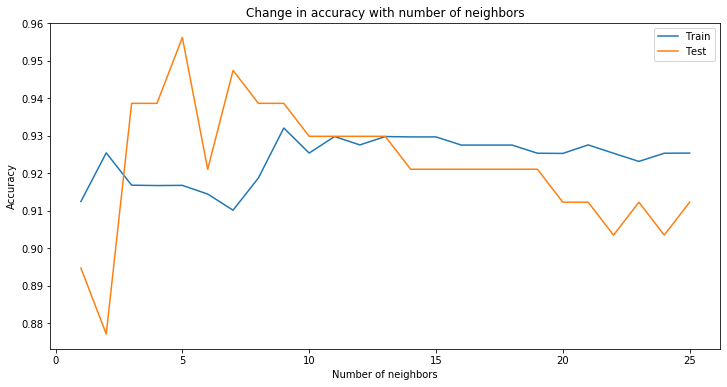

In [21]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,6))
ax.plot(depth, mean_accuracy_train,label='Train')
ax.plot(depth, mean_accuracy_test, label='Test')
ax.legend()
ax.set_xlabel('Number of neighbors')
ax.set_ylabel('Accuracy')
# ax.legend(['Train','Test'])

ax.set_title('Change in accuracy with number of neighbors')
plt.show()
## We can see from the graph illustrated below that at 14 neighbors, the training and test data have minimal overfitting or unfitting problem

In [22]:
## Using 14 nearest neighbors for classifying
clf = neighbors.KNeighborsClassifier(14)
clf = clf.fit(X_train, y_train)

In [23]:
# Using model to predict
y_pred = clf.predict(X_test)

In [24]:
## Model Performance
## Confusion matrix
actuals = np.array(y_test)
predictions = np.array(y_pred)
print(confusion_matrix(predictions, actuals))

[[71  8]
 [ 1 34]]


In [25]:
print(classification_report(predictions, actuals))

              precision    recall  f1-score   support

           B       0.99      0.90      0.94        79
           M       0.81      0.97      0.88        35

    accuracy                           0.92       114
   macro avg       0.90      0.94      0.91       114
weighted avg       0.93      0.92      0.92       114



#### From the three models presented above, we can compare the results from the classification report to recommend which model would be the best in identifying the cancer tumor. Comparing the accuracy rate,the decision tree, logistic regression and KNN has an accuracy of 0.92, 0.95  and 0.92 respectively. Logistic regression has the highest level of accuracy however, we must compare the precision and accuracy rate to conslude our best fit model. The three models decision tree, logisitc regression and KNN have a precision of 0.81, 0.88 and 0.81 respectively. This also supports our choice that logistic regreesion best fits the model in predicting a malignant tumor with 88% precision.Lastly, the recall for all three of them is 0.97. It can safely be concluded that logistic regression is a better model than decision of max depth 7 and KNN with 14 neighbors to predict a malignant tumor.

In [26]:
from sklearn import svm

In [27]:
hyperpara = [{'kernel':['rbf'],'gamma':[0.01,0.05,0.1,0.5], 'C':[0.1,1,10,50]}, {'kernel':['linear'],
                                                                                 'gamma':[0.01,0.05,0.1,0.5], \
                                                                                 'C':[0.1,1,10,50]}]

In [28]:
scores = ['f1']

In [30]:
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV

for x in scores:
    print("finding best parameters for {0:s}".format(x))
    clf = GridSearchCV(svm.SVC(), hyperpara, cv=5, scoring= '%s_macro' % x)
    clf.fit(X_train, y_train)
    
    print('best parameters found: ')
    print()
    print(clf.best_params_)
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    print(means,stds)

finding best parameters for f1
best parameters found: 

{'C': 50, 'gamma': 0.01, 'kernel': 'linear'}

[0.38513514 0.38513514 0.38513514 0.38513514 0.38513514 0.38513514
 0.38513514 0.38513514 0.38513514 0.38513514 0.38513514 0.38513514
 0.38513514 0.38513514 0.38513514 0.38513514 0.95029068 0.95029068
 0.95029068 0.95029068 0.94577192 0.94577192 0.94577192 0.94577192
 0.95297851 0.95297851 0.95297851 0.95297851 0.95755945 0.95755945
 0.95755945 0.95755945] [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03933565 0.03933565
 0.03933565 0.03933565 0.0215675  0.0215675  0.0215675  0.0215675
 0.02435558 0.02435558 0.02435558 0.02435558 0.01589588 0.01589588
 0.01589588 0.01589588]


In [31]:
clf = svm.SVC(C=50, gamma = 0.01, kernel = 'linear')
clf1 = svm.SVC(C=50, gamma = 0.01, kernel = 'linear', probability = True)

In [32]:
clf = clf.fit(X_train, y_train)
clf1 = clf1.fit(X_train, y_train)

In [33]:
y_pred = clf.predict(X_test)
y_score = clf1.predict_proba(X_test)

In [34]:
# using a few other tools like precision, recall and f1 metrics as well as roc curve and lift curve we 
# evaluate our classifier

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.94      1.00      0.97        72
           M       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [35]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score[:,1], pos_label = 'M')

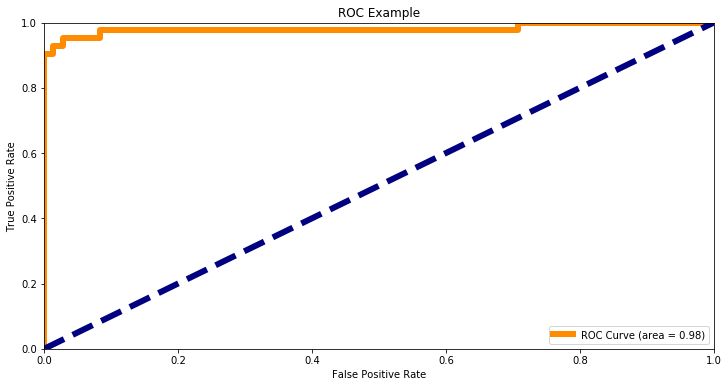

In [36]:
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(12,6))
lw = 6
ax.plot(fpr, tpr, color= 'darkorange', lw=lw, label = 'ROC Curve (area = %0.2f)' % auc(fpr,tpr))
ax.plot([0,1],[0,1], color = 'navy', lw=lw, linestyle = '--')
ax.set_xlim([0.0,1.0])
ax.set_ylim([0.0,1.0])

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Example')

plt.legend(loc = 'lower right')
plt.show()



### Conclusion:
In conclusion, Logisitic regression and Decision tree are the best classifiers as their F-scores are the highest
- DT (benign class: F-1 score = 0.96)
- DT (malignant class: F-1 score = 0.93)
- Log Reg(benign class: F-1 score = 0.97)
- Log Reg (malignant class: F-1 score = 0.94)
- SVM (benign class: F-1 score = 0.97)
- SVM (malignant class: F-1 score = 0.95)